## Import libraries

In [1]:
import numpy as np
from scipy.stats import f, t
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

## load data

In [2]:
dir = r"C:\Users\kawaw\YAMAKAWALAB\TUS_TA\experiment\experiment\params_test.csv"

In [3]:
df = pd.read_csv(filepath_or_buffer=dir, header=None)
data = df.values
print(data.shape)

(3, 12)


In [25]:
N_samples = 5
ALPHA = 0.05  # valid baseline for judging
Names = [
    "K (biceps)",
    "$\omega_n$ (biceps)",
    "$\zeta_n$ (biceps)",
    "K (triceps)",
    "$\omega_n$ (triceps)",
    "$\zeta_n$ (triceps)",
]

In [26]:
def test_significant_test(
    data, name_param, alpha=ALPHA, n_samples=N_samples, names=Names
):
    """statistic test for significant test with t-test.

    Args:
        data (nd.array): data.shape = [5,2]. "10 Hz, 33 Hz, 100 Hz, 333 Hz, 1000 Hz" (mean, std)
        name_param(string): parameter name
    Return:
        bools_difference(nd.array): 0: no significant difference. 1: significant difference.
    """
    bools_difference = np.zeros((data.shape[0], data.shape[0]))

    for i in range(data.shape[0] - 1):
        for j in range(i + 1, data.shape[0]):
            # Sample data
            mean1 = data[i][0]
            std_dev1 = data[i][1]
            n1 = n_samples

            mean2 = data[j][0]
            std_dev2 = data[j][1]
            n2 = n_samples

            # Equal variances (Pooled t-test)
            # Calculate pooled standard deviation
            sp = np.sqrt(
                ((n1 - 1) * std_dev1**2 + (n2 - 1) * std_dev2**2) / (n1 + n2 - 2)
            )

            # Calculate t-statistic
            t_stat_pooled = (mean1 - mean2) / (sp * np.sqrt(1 / n1 + 1 / n2))

            # Degrees of freedom
            df_pooled = n1 + n2 - 2

            # Calculate p-value
            p_value_pooled = 2 * (1 - t.cdf(abs(t_stat_pooled), df_pooled))

            print(
                f"Pooled t-test statistic: {t_stat_pooled}, p-value: {p_value_pooled}"
            )

            # Unequal variances (Welch's t-test)
            # Calculate t-statistic
            t_stat_welch = (mean1 - mean2) / np.sqrt(
                std_dev1**2 / n1 + std_dev2**2 / n2
            )

            # Degrees of freedom using Welch-Satterthwaite equation
            df_welch = ((std_dev1**2 / n1 + std_dev2**2 / n2) ** 2) / (
                (std_dev1**2 / n1) ** 2 / (n1 - 1) + (std_dev2**2 / n2) ** 2 / (n2 - 1)
            )

            # Calculate p-value
            p_value_welch = 2 * (1 - t.cdf(abs(t_stat_welch), df_welch))

            print(f"Welch's t-test statistic: {t_stat_welch}, p-value: {p_value_welch}")

            # Interpretation
            # if p_value_pooled > alpha:
            #     print("Fail to reject the null hypothesis (equal variances): Means are not significantly different")
            # else:
            #     print("Reject the null hypothesis (equal variances): Means are significantly different")
            #     bools_difference[i][j] = 1
            #     bools_difference[j][i] = 1

            if p_value_welch > alpha:
                print("No significantly different")
            else:
                print("Significantly different")
                bools_difference[i][j] = 1
                bools_difference[j][i] = 1

    # show data
    # Define the colormap
    cmap = mcolors.ListedColormap(["orange", "blue"])

    # Normalize the colors to ensure 0 maps to orange and 1 maps to blue
    bounds = [-0.5, 0.5, 1.5]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    # Create the heatmap
    fig, ax = plt.subplots()
    cax = ax.matshow(bools_difference, cmap=cmap, norm=norm)

    # Add color bar for reference
    cbar = plt.colorbar(cax, ticks=[0, 1])
    cbar.ax.set_yticklabels(["0", "1"])

    # Add labels to each cell
    for i in range(data.shape[0]):
        for j in range(data.shape[0]):
            c = bools_difference[j, i]
            ax.text(i, j, str(c), va="center", ha="center")

    # Set x and y labels
    ax.set_xticks(np.arange(data.shape[0]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels([f"{i}" for i in range(1, data.shape[0] + 1)])
    ax.set_yticklabels([f"{i}" for i in range(1, data.shape[0] + 1)])
    ax.set_title(name_param)
    # Set labels to axes
    plt.xlabel("trial")
    plt.ylabel("trial")

    # Show the plot
    plt.show()

    return bools_difference

K (biceps) test
Pooled t-test statistic: -0.9692406423549359, p-value: 0.3608114391764241
Welch's t-test statistic: -0.9692406423549359, p-value: 0.37240474956397884
No significantly different
Pooled t-test statistic: -1.139119058376479, p-value: 0.2876114383544319
Welch's t-test statistic: -1.139119058376479, p-value: 0.2912162351419536
No significantly different
Pooled t-test statistic: 0.1355108762668765, p-value: 0.895555641863766
Welch's t-test statistic: 0.13551087626687652, p-value: 0.8960974230417986
No significantly different


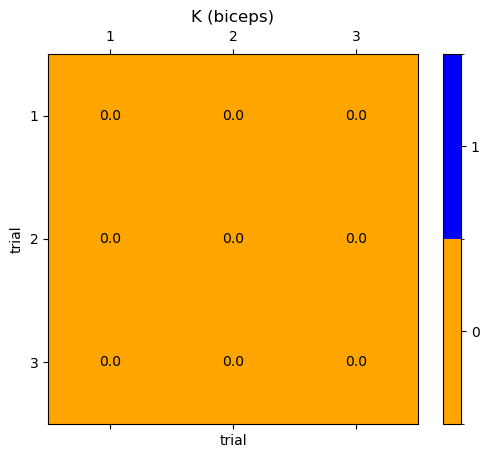

$\omega_n$ (biceps) test
Pooled t-test statistic: 0.7963057384106947, p-value: 0.4488372460229253
Welch's t-test statistic: 0.7963057384106947, p-value: 0.46361155537402277
No significantly different
Pooled t-test statistic: 0.9603595226747244, p-value: 0.36499706814761934
Welch's t-test statistic: 0.9603595226747246, p-value: 0.3789753164884466
No significantly different
Pooled t-test statistic: 0.3946366741654044, p-value: 0.703423320057639
Welch's t-test statistic: 0.3946366741654044, p-value: 0.7040271626508301
No significantly different


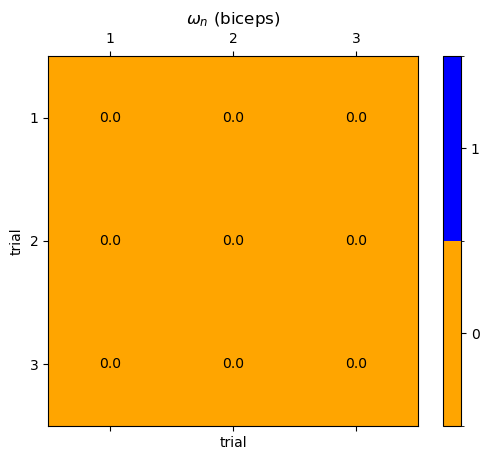

$\zeta_n$ (biceps) test
Pooled t-test statistic: 0.6728311478369045, p-value: 0.5200126721232565
Welch's t-test statistic: 0.6728311478369045, p-value: 0.5221011882997422
No significantly different
Pooled t-test statistic: -0.3103586748182389, p-value: 0.764219731886
Welch's t-test statistic: -0.3103586748182389, p-value: 0.7645153914473628
No significantly different
Pooled t-test statistic: -0.8859379186996605, p-value: 0.4014961345757606
Welch's t-test statistic: -0.8859379186996605, p-value: 0.4020717293738265
No significantly different


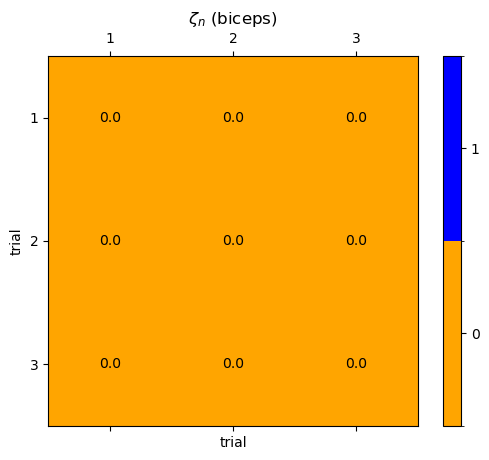

K (triceps) test
Pooled t-test statistic: -0.2772507711995722, p-value: 0.7886169752339236
Welch's t-test statistic: -0.27725077119957214, p-value: 0.7886913456014997
No significantly different
Pooled t-test statistic: 1.763392421800791, p-value: 0.1158466835874139
Welch's t-test statistic: 1.7633924218007913, p-value: 0.14090530859701156
No significantly different
Pooled t-test statistic: 2.328865579910214, p-value: 0.048247054581088245
Welch's t-test statistic: 2.328865579910214, p-value: 0.06785958961905925
No significantly different


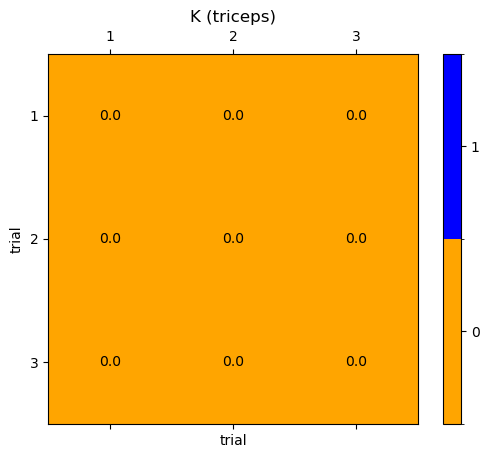

$\omega_n$ (triceps) test
Pooled t-test statistic: 2.9942404818854156, p-value: 0.017222224712857503
Welch's t-test statistic: 2.9942404818854156, p-value: 0.02477287235045611
Significantly different
Pooled t-test statistic: 2.460323915653926, p-value: 0.03929890510206824
Welch's t-test statistic: 2.460323915653926, p-value: 0.0401636534811316
Significantly different
Pooled t-test statistic: -0.13896345645248237, p-value: 0.8929135310179543
Welch's t-test statistic: -0.13896345645248237, p-value: 0.8936713053765319
No significantly different


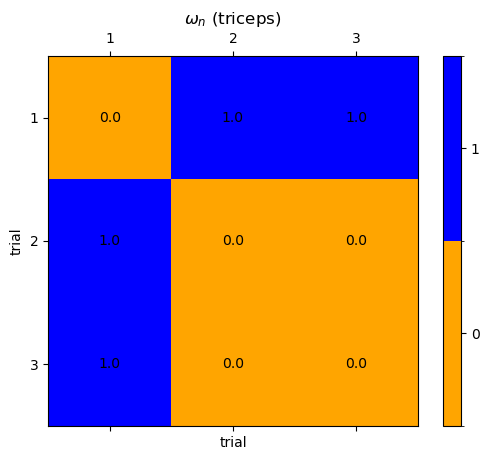

$\zeta_n$ (triceps) test
Pooled t-test statistic: 0.20012703568552245, p-value: 0.8463749241532899
Welch's t-test statistic: 0.20012703568552245, p-value: 0.8471510050802609
No significantly different
Pooled t-test statistic: 1.329128273018214, p-value: 0.2204600209338543
Welch's t-test statistic: 1.3291282730182141, p-value: 0.22046271518763394
No significantly different
Pooled t-test statistic: 0.8324815047975637, p-value: 0.42928660543170216
Welch's t-test statistic: 0.8324815047975638, p-value: 0.43286425746697543
No significantly different


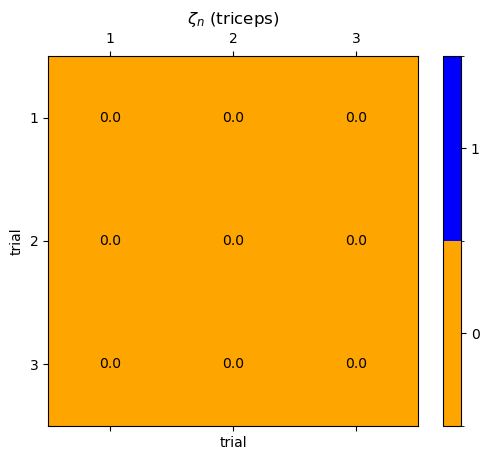

In [27]:
num_params = data.shape[1] // 2
save_difference = np.zeros((num_params, data.shape[0], data.shape[0]))
for i in range(num_params):
    print(f"{Names[i]} test")
    save_difference[i, :, :] = test_significant_test(
        data[:, 2 * i : 2 * (i + 1)], Names[i]
    )